## Written by: Xihe Yu
# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint: expand the squares, and rebuild the quadratic in terms of $\theta$...


# Homework #2 Part I: Solution

---
a) Rebuild the first expression:
    $$\exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] $$
First, expand the term with squares: 
    $$\sum_{i=1}^n \phi\left(x_i-\theta\right)^2 = \phi(\sum_{i=1}^n {x_i^2} - 2 \sum_{i=1}^{n}{x_i} + n\theta^2)$$
    $$\tau\left(\theta-\theta_0\right)^2 = \tau\theta^2-2\tau\theta_0\theta+\tau\theta_0^2$$
The original expression becomes:
    $$\exp\left[-\frac{1}{2}\left(\phi\left(\sum_{i=1}^n {x_i^2} - 2 \sum_{i=1}^{n}{x_i}\theta + n\theta^2\right)+ \left(\tau\theta^2-2\tau\theta_0\theta+\tau\theta_0^2\right)\right)\right]$$
Re-arrange it to function of $\theta$, then get:
    $$\exp\left[-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau\theta_0^2+\phi \sum_{i=1}^n {x_i^2}\right)\right]$$
                        
b) Rebuild the second expression:
    $$\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)$$
    
First, to make the computation easier, I denote: 
    $$\kappa=\tau \theta_0+\phi \sum_{i=1}^n x_i$$
Now, the original expression of the square becomes:
    $$(\theta-\frac{\\\kappa}{\tau+n \phi})^2$$
Then, it is much easier to expand the square as the following:
    $$\theta^2-(\frac{\\2\kappa}{\tau+n \phi})\theta+\frac{\\\kappa^2}{(\tau+n \phi)^2}$$
Next, multiply the expanded expression of square by  $-\frac{1}{2}(\tau+n \phi)$ as in the given expression, some terms will cancel out, so I get:
    $$-\frac{1}{2}(\tau+n \phi)\theta^2+\kappa\theta-\frac{1}{2}(\frac{\kappa^2}{\tau+n \phi})$$
Then, substitute $\kappa$ with $\tau \theta_0+\phi \sum_{i=1}^n x_i$ back into the above expression, and also add the exponential outside the whole expression, I get:
$$\exp\left(-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)\right)$$


Since those parts containing $\theta$ in the two expressions are exactly the same,this proves they are proportional to each other.

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. How do ***log likelihoods*** and ***posteriors*** differ from each other as a result of ***improper priors*** pdiscussed below] and ***marginal likelihood constants***?

<!-- posterior proporitional to joint... --> 


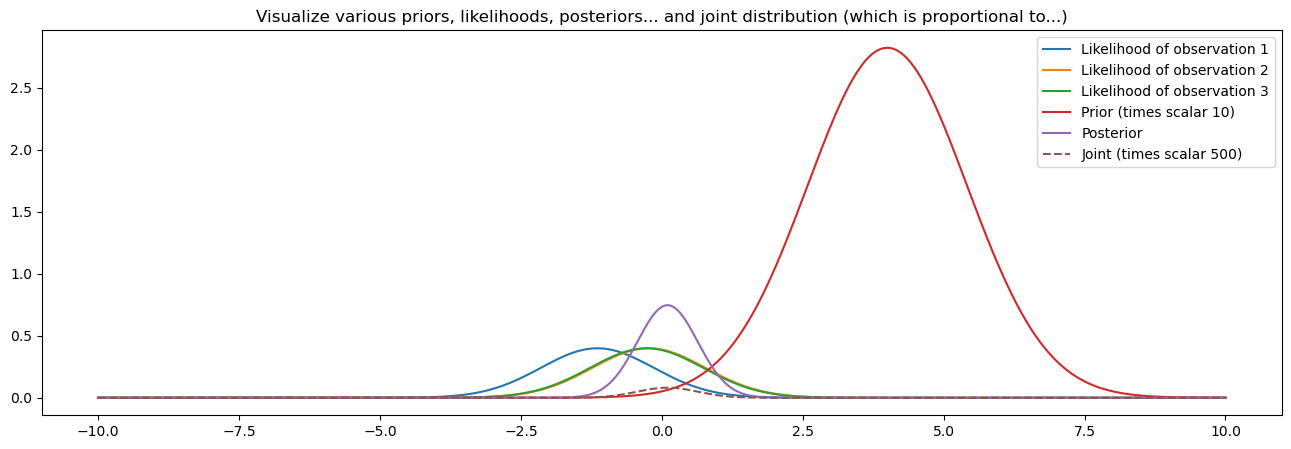

In [7]:
# 1.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)
likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) 
joint = 500 * np.prod(likelihoods, axis=0) * prior
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16, 5))


for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {i+1}")


plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
plt.show()

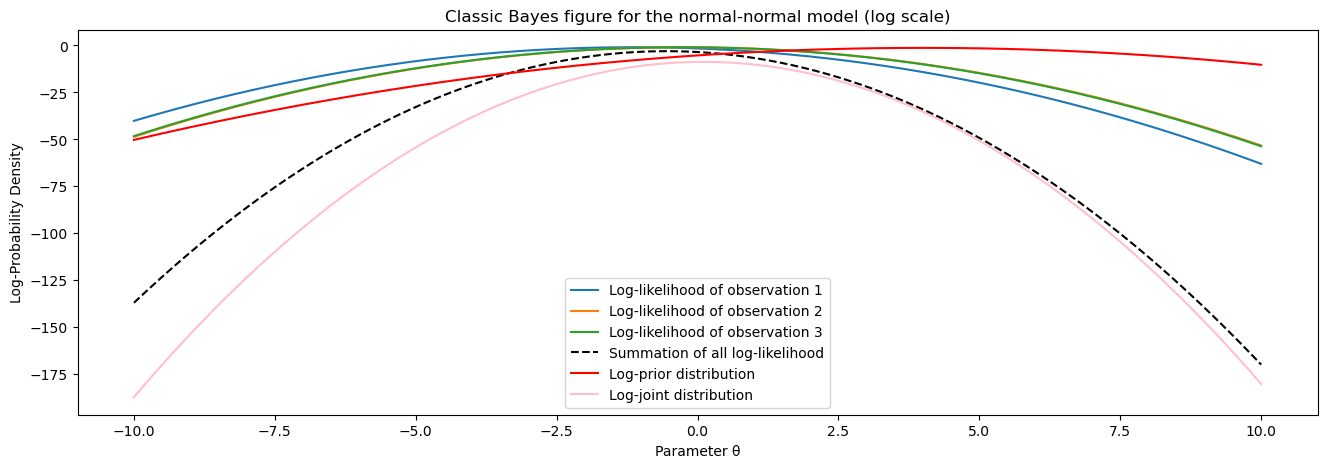

In [13]:
# 2.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3 
theta_0, tau = 4, 1/2 
phi = 1 
parameter_domain = np.linspace(-10, 10, 1001)
log_likelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])
sum_log_likelihood = log_likelihoods.sum(axis=0)
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
log_joint = sum_log_likelihood + log_prior


plt.figure(figsize=(16, 5))
for i, log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of observation {i+1}")

plt.plot(parameter_domain, sum_log_likelihood, label="Summation of all log-likelihood", color='black',linestyle ='--')
plt.plot(parameter_domain, log_prior, label="Log-prior distribution", color='red')
plt.plot(parameter_domain, log_joint, label="Log-joint distribution", color='pink')

plt.legend()
plt.title("Classic Bayes figure for the normal-normal model (log scale)")
plt.xlabel("Parameter θ")
plt.ylabel("Log-Probability Density")
plt.show()

# 3.
The posterior distribution of a normal likelihood with $p(\theta) \propto 1$ is a normal distribution.
The normal likelihood for a set of observations with known precision $\phi$ and known mean $\theta$ ia given by:
$$p(x | \theta, \phi) = \prod_{i=1}^{n} \sqrt{\frac{\phi}{2\pi}} \exp\left(-\frac{\phi}{2} (x_i - \theta)^2\right)$$
With a uniform prior $p(\theta) \propto 1$, the posterior distribution $p(\theta|x)$  is proportional to the likelihood function:
$$p(\theta | x) \propto \prod_{i=1}^{n} \sqrt{\frac{\phi}{2\pi}} \exp\left(-\frac{\phi}{2} (x_i - \theta)^2\right)$$
This can be further simplified by ignoring the constant factors, since they will cancel out after normalization:
$$p(\theta | x) \propto \exp\left(-\frac{\phi}{2} \sum_{i=1}^{n} (x_i - \theta)^2\right)$$
The exponent is a sum of squares, which can be expanded and rewritten as:
$$\sum_{i=1}^{n} (x_i - \theta)^2 = n\bar{x}^2 - 2n\bar{x}\theta + n\theta^2$$
Completing the square to express this in the form of a normal distribution's exponent yields:
$$-\frac{\phi}{2} [n\theta^2 - 2n\bar{x}\theta + n\bar{x}^2] = -\frac{\phi}{2} n (\theta - \bar{x})^2$$
Thus, the posterior distribution is:
$$\theta | x \sim \mathcal{N}\left(\bar{x}, \frac{1}{n\phi}\right)$$
Where $\bar{x}$ is the sample mean, calculated as:
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$
And the posterior variance is the inverse of the sample precision multiplied by the number of observations.

     



# 4.
**Log Likelihoods**
- ***Improper Priors***:These are solely a function of the data and the model parameters. They are expressed as the natural logarithm of the likelihood function and are completely independent of the prior, whether it is proper or improper.The log likelihood is not directly affected by the choice of prior because it only concerns the data and the parameter $\theta$, not the prior belief about $\theta$.

- ***Marginal Likelihood Constants***: The marginal likelihood is a normalizing constant in Bayesian inference, but it does not affect the log likelihood. The log likelihood involves the data and the parameters, whereas the marginal likelihood is the integral of the likelihood and the prior over all possible values of the parameters, which normalizes the posterior distribution.

**Posteriors**
- ***Improper Priors***:An improper prior is a prior distribution that does not integrate to one and thus is not a valid probability distribution. Using an improper prior can sometimes lead to an improper posterior, which also does not integrate to one. However, in some cases, the data can "overwhelm" the improper prior, leading to a proper posterior. The effect of an improper prior on the posterior depends on the data and the form of the prior. In the case of a non-informative or uniform improper prior, if the likelihood is strong enough, it can yield a proper posterior.
- ***Marginal Likelihood Constants***:The posterior is inversely proportional to the marginal likelihood, which acts as a normalizing constant. If the marginal likelihood is a complex constant, it can make the computation of the exact posterior distribution difficult. However, the marginal likelihood is crucial for model comparison and averaging in Bayesian model inference.When using an improper prior, the role of the marginal likelihood is crucial. It must be checked to see if it results in a finite value when combined with the likelihood. If the likelihood is not informative enough, the product of the likelihood and an improper prior may not be integrable, meaning that the posterior cannot be normalized properly, regardless of the marginal likelihood.